## Yöntem : sonlu farklar analizi

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [33]:
def first_claculate(m, k, ks, dt, T):
    wn = (2* math.pi)/T
    c = 2 * ks * math.sqrt(k * m)
    hat_k = (m / (dt ** 2)) + (c / (2 * dt))
    a = (((m / (dt ** 2))) - (c / (2 * dt)))
    b = (k - ((2 * m) / (dt ** 2)))
    
    return wn, c, hat_k, a, b 

In [34]:
data = """0.00630 0.00364 0.00099 0.00428 0.00758 0.01087 0.00682 0.00277
 -0.00128 0.00368 0.00864 0.01360 0.00727 0.00094 0.00420 0.00221
 0.00021 0.00444 0.00867 0.01290 0.01713 -0.00343 -0.02400 -0.00992
 0.00416 0.00528 0.01653 0.02779 0.03904 0.02449 0.00995 0.00961
 0.00926 0.00892 -0.00486 -0.01864 -0.03242 -0.03365 -0.05723 -0.04534
 -0.03346 -0.03201 -0.03056 -0.02911 -0.02766 -0.04116 -0.05466 -0.06816
 -0.08166 -0.06846 -0.05527 -0.04208 -0.04259 -0.04311 -0.02428 -0.00545
 0.01338 0.03221 0.05104 0.06987 0.08870 0.04524 0.00179 -0.04167
 -0.08513 -0.12858 -0.17204 -0.12908 -0.08613 -0.08902 -0.09192 -0.09482
 -0.09324 -0.09166 -0.09478 -0.09789 -0.12902 -0.07652 -0.02401 0.02849
 0.08099 0.13350 0.18600 0.23850 0.21993 0.20135 0.18277 0.16420
 0.14562 0.16143 0.17725 0.13215 0.08705 0.04196 -0.00314 -0.04824
 -0.09334 -0.13843 -0.18353 -0.22863 -0.27372 -0.31882 -0.25024 -0.18166
 -0.11309 -0.04451 0.02407 0.09265 0.16123 0.22981 0.29839 0.23197
 0.16554 0.09912 0.03270 -0.03372 -0.10014 -0.16656 -0.23299 -0.29941
 -0.00421 0.29099 0.22380 0.15662 0.08943 0.02224 -0.04495 0.01834
 0.08163 0.14491 0.20820 0.18973 0.17125 0.13759 0.10393 0.07027
 0.03661 0.00295 -0.03071 -0.00561 0.01948 0.04458 0.06468 0.08478
 0.10487 0.05895 0.01303 -0.03289 -0.07882 -0.03556 0.00771 0.05097
 0.01013 -0.03071 -0.07156 -0.11240 -0.15324 -0.11314 -0.07304 -0.03294
 0.00715 -0.06350 -0.13415 -0.20480 -0.12482 -0.04485 0.03513 0.11510
 0.19508 0.12301 0.05094 -0.02113 -0.09320 -0.02663 0.03995 0.10653
 0.17311 0.11283 0.05255 -0.00772 0.01064 0.02900 0.04737 0.06573
 0.02021 -0.02530 -0.07081 -0.04107 -0.01133 0.00288 0.01709 0.03131
 -0.02278 -0.07686 -0.13095 -0.18504 -0.14347 -0.10190 -0.06034 -0.01877
 0.02280 -0.00996 -0.04272 -0.02147 -0.00021 0.02104 -0.01459 -0.05022
 -0.08585 -0.12148 -0.15711 -0.19274 -0.22837 -0.18145 -0.13453 -0.08761
 -0.04069 0.00623 0.05316 0.10008 0.14700 0.09754 0.04808 -0.00138
 0.05141 0.10420 0.15699 0.20979 0.26258 0.16996 0.07734 -0.01527
 -0.10789 -0.20051 -0.06786 0.06479 0.01671 -0.03137 -0.07945 -0.12753
 -0.17561 -0.22369 -0.27177 -0.15851 -0.04525 0.06802 0.18128 0.14464
 0.10800 0.07137 0.03473 0.09666 0.15860 0.22053 0.18296 0.14538
 0.10780 0.07023 0.03265 0.06649 0.10033 0.13417 0.10337 0.07257
 0.04177 0.01097 -0.01983 0.04438 0.10860 0.17281 0.10416 0.03551
 -0.03315 -0.10180 -0.07262 -0.04344 -0.01426 0.01492 -0.02025 -0.05543
 -0.09060 -0.12578 -0.16095 -0.19613 -0.14784 -0.09955 -0.05127 -0.00298
 -0.01952 -0.03605 -0.05259 -0.04182 -0.03106 -0.02903 -0.02699 0.02515
 0.01770 0.02213 0.02656 0.00419 -0.01819 -0.04057 -0.06294 -0.02417
 0.01460 0.05337 0.02428 -0.00480 -0.03389 -0.00557 0.02274 0.00679
 -0.00915 -0.02509 -0.04103 -0.05698 -0.01826 0.02046 0.00454 -0.01138
 -0.00215 0.00708 0.00496 0.00285 0.00074 -0.00534 -0.01141 0.00361
 0.01863 0.03365 0.04867 0.03040 0.01213 -0.00614 -0.02441 0.01375
 0.01099 0.00823 0.00547 0.00812 0.01077 -0.00692 -0.02461 -0.04230
 -0.05999 -0.07768 -0.09538 -0.06209 -0.02880 0.00448 0.03777 0.01773
 -0.00231 -0.02235 0.01791 0.05816 0.03738 0.01660 -0.00418 -0.02496
 -0.04574 -0.02071 0.00432 0.02935 0.01526 0.01806 0.02086 0.00793
 -0.00501 -0.01795 -0.03089 -0.01841 -0.00593 0.00655 -0.02519 -0.05693
 -0.04045 -0.02398 -0.00750 0.00897 0.00384 -0.00129 -0.00642 -0.01156
 -0.02619 -0.04082 -0.05545 -0.04366 -0.03188 -0.06964 -0.05634 -0.04303
 -0.02972 -0.01642 -0.00311 0.01020 0.02350 0.03681 0.05011 0.02436
 -0.00139 -0.02714 -0.00309 0.02096 0.04501 0.06906 0.05773 0.04640
 0.03507 0.03357 0.03207 0.03057 0.03250 0.03444 0.03637 0.01348
 -0.00942 -0.03231 -0.02997 -0.03095 -0.03192 -0.02588 -0.01984 -0.01379
 -0.00775 -0.01449 -0.02123 0.01523 0.05170 0.08816 0.12463 0.16109
 0.12987 0.09864 0.06741 0.03618 0.00495 0.00420 0.00345 0.00269
 -0.05922 -0.12112 -0.18303 -0.12043 -0.05782 0.00479 0.06740 0.13001
 0.08373 0.03745 0.06979 0.10213 -0.03517 -0.17247 -0.13763 -0.10278
 -0.06794 -0.03310 -0.03647 -0.03984 -0.00517 0.02950 0.06417 0.09883
 0.13350 0.05924 -0.01503 -0.08929 -0.16355 -0.06096 0.04164 0.01551
 -0.01061 -0.03674 -0.06287 -0.08899 -0.05430 -0.01961 0.01508 0.04977
 0.08446 0.05023 0.01600 -0.01823 -0.05246 -0.08669 -0.06769 -0.04870
 -0.02970 -0.01071 0.00829 -0.00314 0.02966 0.06246 -0.00234 -0.06714
 -0.04051 -0.01388 0.01274 0.00805 0.03024 0.05243 0.02351 -0.00541
 -0.03432 -0.06324 -0.09215 -0.12107 -0.08450 -0.04794 -0.01137 0.02520
 0.06177 0.04028 0.01880 0.04456 0.07032 0.09608 0.12184 0.06350
 0.00517 -0.05317 -0.03124 -0.00930 0.01263 0.03457 0.03283 0.03109
 0.02935 0.04511 0.06087 0.07663 0.09239 0.05742 0.02245 -0.01252
 0.00680 0.02611 0.04543 0.01571 -0.01402 -0.04374 -0.07347 -0.03990
 -0.00633 0.02724 0.06080 0.03669 0.01258 -0.01153 -0.03564 -0.00677
 0.02210 0.05098 0.07985 0.06915 0.05845 0.04775 0.03706 0.02636
 0.05822 0.09009 0.12196 0.10069 0.07943 0.05816 0.03689 0.01563
 -0.00564 -0.02690 -0.04817 -0.06944 -0.09070 -0.11197 -0.11521 -0.11846
 -0.12170 -0.12494 -0.16500 -0.20505 -0.15713 -0.10921 -0.06129 -0.01337
 0.03455 0.08247 0.07576 0.06906 0.06236 0.08735 0.11235 0.13734
 0.12175 0.10616 0.09057 0.07498 0.08011 0.08524 0.09037 0.06208
 0.03378 0.00549 -0.02281 -0.05444 -0.04030 -0.02615 -0.01201 -0.02028
 -0.02855 -0.06243 -0.03524 -0.00805 -0.04948 -0.03643 -0.02337 -0.03368
 -0.01879 -0.00389 0.01100 0.02589 0.01446 0.00303 -0.00840 0.00463
 0.01766 0.03069 0.04372 0.02165 -0.00042 -0.02249 -0.04456 -0.03638
 -0.02819 -0.02001 -0.01182 -0.02445 -0.03707 -0.04969 -0.05882 -0.06795
 -0.07707 -0.08620 -0.09533 -0.06276 -0.03018 0.00239 0.03496 0.04399
 0.05301 0.03176 0.01051 -0.01073 -0.03198 -0.05323 0.00186 0.05696
 0.01985 -0.01726 -0.05438 -0.01204 0.03031 0.07265 0.11499 0.07237
 0.02975 -0.01288 0.01212 0.03711 0.03517 0.03323 0.01853 0.00383
 0.00342 -0.02181 -0.04704 -0.07227 -0.09750 -0.12273 -0.08317 -0.04362
 -0.00407 0.03549 0.07504 0.11460 0.07769 0.04078 0.00387 0.00284
 0.00182 -0.05513 0.04732 0.05223 0.05715 0.06206 0.06698 0.07189
 0.02705 -0.01779 -0.06263 -0.10747 -0.15232 -0.12591 -0.09950 -0.07309
 -0.04668 -0.02027 0.00614 0.03255 0.00859 -0.01537 -0.03932 -0.06328
 -0.03322 -0.00315 0.02691 0.01196 -0.00300 0.00335 0.00970 0.01605
 0.02239 0.04215 0.06191 0.08167 0.03477 -0.01212 -0.01309 -0.01407
 -0.05274 -0.02544 0.00186 0.02916 0.05646 0.08376 0.01754 -0.04869
 -0.02074 0.00722 0.03517 -0.00528 -0.04572 -0.08617 -0.06960 -0.05303
 -0.03646 -0.01989 -0.00332 0.01325 0.02982 0.01101 -0.00781 -0.02662
 -0.00563 0.01536 0.03635 0.05734 0.03159 0.00584 -0.01992 -0.00201
 0.01589 -0.01024 -0.03636 -0.06249 -0.04780 -0.03311 -0.04941 -0.06570
 -0.08200 -0.04980 -0.01760 0.01460 0.04680 0.07900 0.04750 0.01600
 -0.01550 -0.00102 0.01347 0.02795 0.04244 0.05692 0.03781 0.01870
 -0.00041 -0.01952 -0.00427 0.01098 0.02623 0.04148 0.01821 -0.00506
 -0.00874 -0.03726 -0.06579 -0.02600 0.01380 0.05359 0.09338 0.05883
 0.02429 -0.01026 -0.04480 -0.01083 -0.01869 -0.02655 -0.03441 -0.02503
 -0.01564 -0.00626 -0.01009 -0.01392 0.01490 0.04372 0.03463 0.02098
 0.00733 -0.00632 -0.01997 0.00767 0.03532 0.03409 0.03287 0.03164
 0.02403 0.01642 0.00982 0.00322 -0.00339 0.02202 -0.01941 -0.06085
 -0.10228 -0.07847 -0.05466 -0.03084 -0.00703 0.01678 0.01946 0.02214
 0.02483 0.01809 -0.00202 -0.02213 -0.00278 0.01656 0.03590 0.05525
 0.07459 0.06203 0.04948 0.03692 -0.00145 0.04599 0.04079 0.03558
 0.03037 0.03626 0.04215 0.04803 0.05392 0.04947 0.04502 0.04056
 0.03611 0.03166 0.00614 -0.01937 -0.04489 -0.07040 -0.09592 -0.07745
 -0.05899 -0.04052 -0.02206 -0.00359 0.01487 0.01005 0.00523 0.00041
 -0.00441 -0.00923 -0.01189 -0.01523 -0.01856 -0.02190 -0.00983 0.00224
 0.01431 0.00335 -0.00760 -0.01856 -0.00737 0.00383 0.01502 0.02622
 0.01016 -0.00590 -0.02196 -0.00121 0.01953 0.04027 0.02826 0.01625
 0.00424 0.00196 -0.00031 -0.00258 -0.00486 -0.00713 -0.00941 -0.01168
 -0.01396 -0.01750 -0.02104 -0.02458 -0.02813 -0.03167 -0.03521 -0.04205
 -0.04889 -0.03559 -0.02229 -0.00899 0.00431 0.01762 0.00714 -0.00334
 -0.01383 0.01314 0.04011 0.06708 0.04820 0.02932 0.01043 -0.00845
 -0.02733 -0.04621 -0.03155 -0.01688 -0.00222 0.01244 0.02683 0.04121
 0.05559 0.03253 0.00946 -0.01360 -0.01432 -0.01504 -0.01576 -0.04209
 -0.02685 -0.01161 0.00363 0.01887 0.03411 0.03115 0.02819 0.02917
 0.03015 0.03113 0.00388 -0.02337 -0.05062 -0.03820 -0.02579 -0.01337
 -0.00095 0.01146 0.02388 0.03629 0.01047 -0.01535 -0.04117 -0.06699
 -0.05207 -0.03715 -0.02222 -0.00730 0.00762 0.02254 0.03747 0.04001
 0.04256 0.04507 0.04759 0.05010 0.04545 0.04080 0.02876 0.01671
 0.00467 -0.00738 -0.00116 0.00506 0.01128 0.01750 -0.00211 -0.02173
 -0.04135 -0.06096 -0.08058 -0.06995 -0.05931 -0.04868 -0.03805 -0.02557
 -0.01310 -0.00063 0.01185 0.02432 0.03680 0.04927 0.02974 0.01021
 -0.00932 -0.02884 -0.04837 -0.06790 -0.04862 -0.02934 -0.01006 0.00922
 0.02851 0.04779 0.02456 0.00133 -0.02190 -0.04513 -0.06836 -0.04978
 -0.03120 -0.01262 0.00596 0.02453 0.04311 0.06169 0.08027 0.09885
 0.06452 0.03019 -0.00414 -0.03848 -0.07281 -0.05999 -0.04717 -0.03435
 -0.03231 -0.03028 -0.02824 -0.00396 0.02032 0.00313 -0.01406 -0.03124
 -0.04843 -0.06562 -0.05132 -0.03702 -0.02272 -0.00843 0.00587 0.02017
 0.02698 0.03379 0.04061 0.04742 0.05423 0.03535 0.01647 0.01622
 0.01598 0.01574 0.00747 -0.00080 -0.00907 0.00072 0.01051 0.02030
 0.03009 0.03989 0.03478 0.02967 0.02457 0.03075 0.03694 0.04313
 0.04931 0.05550 0.06168 -0.00526 -0.07220 -0.06336 -0.05451 -0.04566
 -0.03681 -0.03678 -0.03675 -0.03672 -0.01765 0.00143 0.02051 0.03958
 0.05866 0.03556 0.01245 -0.01066 -0.03376 -0.05687 -0.04502 -0.03317
 -0.02131 -0.00946 0.00239 -0.00208 -0.00654 -0.01101 -0.01548 -0.01200
 -0.00851 -0.00503 -0.00154 0.00195 0.00051 -0.00092 0.01135 0.02363
 0.03590 0.04818 0.06045 0.07273 0.02847 -0.01579 -0.06004 -0.05069
 -0.04134 -0.03199 -0.03135 -0.03071 -0.03007 -0.01863 -0.00719 0.00425
 0.01570 0.02714 0.03858 0.02975 0.02092 0.02334 0.02576 0.02819
 0.03061 0.03304 0.01371 -0.00561 -0.02494 -0.02208 -0.01923 -0.01638
 -0.01353 -0.01261 -0.01170 -0.00169 0.00833 0.01834 0.02835 0.03836
 0.04838 0.03749 0.02660 0.01571 0.00482 -0.00607 -0.01696 -0.00780
 0.00136 0.01052 0.01968 0.02884 -0.00504 -0.03893 -0.02342 -0.00791
 0.00759 0.02310 0.00707 -0.00895 -0.02498 -0.04100 -0.05703 -0.02920
 -0.00137 0.02645 0.05428 0.03587 0.01746 -0.00096 -0.01937 -0.03778
 -0.02281 -0.00784 0.00713 0.02210 0.03707 0.05204 0.06701 0.08198
 0.03085 -0.02027 -0.07140 -0.12253 -0.08644 -0.05035 -0.01426 0.02183
 0.05792 0.09400 0.13009 0.03611 -0.05787 -0.04802 -0.03817 -0.02832
 -0.01846 -0.00861 -0.03652 -0.06444 -0.06169 -0.05894 -0.05618 -0.06073
 -0.06528 -0.04628 -0.02728 -0.00829 0.01071 0.02970 0.03138 0.03306
 0.03474 0.03642 0.04574 0.05506 0.06439 0.07371 0.08303 0.03605
 -0.01092 -0.05790 -0.04696 -0.03602 -0.02508 -0.01414 -0.03561 -0.05708
 -0.07855 -0.06304 -0.04753 -0.03203 -0.01652 -0.00102 0.00922 0.01946
 0.02970 0.03993 0.05017 0.06041 0.07065 0.08089 -0.00192 -0.08473
 -0.07032 -0.05590 -0.04148 -0.05296 -0.06443 -0.07590 -0.08738 -0.09885
 -0.06798 -0.03710 -0.00623 0.02465 0.05553 0.08640 0.11728 0.14815
 0.08715 0.02615 -0.03485 -0.09584 -0.07100 -0.04616 -0.02132 0.00353
 0.02837 0.05321 -0.00469 -0.06258 -0.12048 -0.09960 -0.07872 -0.05784
 -0.03696 -0.01608 0.00480 0.02568 0.04656 0.06744 0.08832 0.10920
 0.13008 0.10995 0.08982 0.06969 0.04955 0.04006 0.03056 0.02107
 0.01158 0.00780 0.00402 0.00024 -0.00354 -0.00732 -0.01110 -0.00780
 -0.00450 -0.00120 0.00210 0.00540 -0.00831 -0.02203 -0.03575 -0.04947
 -0.06319 -0.05046 -0.03773 -0.02500 -0.01227 0.00046 0.00482 0.00919
 0.01355 0.01791 0.02228 0.00883 -0.00462 -0.01807 -0.03152 -0.02276
 -0.01401 -0.00526 0.00350 0.01225 0.02101 0.01437 0.00773 0.00110
 0.00823 0.01537 0.02251 0.01713 0.01175 0.00637 0.01376 0.02114
 0.02852 0.03591 0.04329 0.03458 0.02587 0.01715 0.00844 -0.00027
 -0.00898 -0.00126 0.00645 0.01417 0.02039 0.02661 0.03283 0.03905
 0.04527 0.03639 0.02750 0.01862 0.00974 0.00086 -0.01333 -0.02752
 -0.04171 -0.02812 -0.01453 -0.00094 0.01264 0.02623 0.01690 0.00756
 -0.00177 -0.01111 -0.02044 -0.02977 -0.03911 -0.02442 -0.00973 0.00496
 0.01965 0.03434 0.02054 0.00674 -0.00706 -0.02086 -0.03466 -0.02663
 -0.01860 -0.01057 -0.00254 -0.00063 0.00128 0.00319 0.00510 0.00999
 0.01488 0.00791 0.00093 -0.00605 0.00342 0.01288 0.02235 0.03181
 0.04128 0.02707 0.01287 -0.00134 -0.01554 -0.02975 -0.04395 -0.03612
 -0.02828 -0.02044 -0.01260 -0.00476 0.00307 0.01091 0.00984 0.00876
 0.00768 0.00661 0.01234 0.01807 0.02380 0.02953 0.03526 0.02784
 0.02042 0.01300 -0.03415 -0.00628 -0.00621 -0.00615 -0.00609 -0.00602
 -0.00596 -0.00590 -0.00583 -0.00577 -0.00571 -0.00564 -0.00558 -0.00552
 -0.00545 -0.00539 -0.00532 -0.00526 -0.00520 -0.00513 -0.00507 -0.00501
 -0.00494 -0.00488 -0.00482 -0.00475 -0.00469 -0.00463 -0.00456 -0.00450
 -0.00444 -0.00437 -0.00431 -0.00425 -0.00418 -0.00412 -0.00406 -0.00399
 -0.00393 -0.00387 -0.00380 -0.00374 -0.00368 -0.00361 -0.00355 -0.00349
 -0.00342 -0.00336 -0.00330 -0.00323 -0.00317 -0.00311 -0.00304 -0.00298
 -0.00292 -0.00285 -0.00279 -0.00273 -0.00266 -0.00260 -0.00254 -0.00247
 -0.00241 -0.00235 -0.00228 -0.00222 -0.00216 -0.00209 -0.00203 -0.00197
 -0.00190 -0.00184 -0.00178 -0.00171 -0.00165 -0.00158 -0.00152 -0.00146
 -0.00139 -0.00133 -0.00127 -0.00120 -0.00114 -0.00108 -0.00101 -0.00095
 -0.00089 -0.00082 -0.00076 -0.00070 -0.00063 -0.00057 -0.00051 -0.00044
 -0.00038 -0.00032 -0.00025 -0.00019 -0.00013 -0.00006 0.00000"""

values_str = data.split()

values_float = [float(value) for value in values_str]

hareket_degerler_2 = []

for value in values_float:
    hareket_degerler_2.append(value)


In [35]:
len(hareket_degerler_2)

1559

In [36]:
def central_difference(m, k, ks, dt, i, ground_acc, T):
    wn, c, hat_k, a, b  = first_claculate(m, k, ks, dt, T)
    u_i = 0 
    u_i_1 = 0
    u_i_1_spare = 0
    u_i_spare = 0
    t_i = 0
    data = {'step': [],
            'ti': [],
           'ground_acc': [],
           'pi_kn': [],
           'u_i_1': [],
           'u_i': [],
           'pi': [],
           'u_plus_1': [],
           'ui_value': [],
           'ui2_value': [],
           'total_acc_ui2': [],}
    df = pd.DataFrame(data)
    # ikinci adım
    for n in range(0, i):
        pi_kn = ground_acc[n] * m
        pi = pi_kn - (a * u_i_1) - (b * u_i)
        u_plus_1 = pi / hat_k
        u_i_1 = u_i
        u_i = u_plus_1
        ui_value = (u_plus_1 - u_i_1)/(2*dt)
        ui2_value = (u_plus_1 - (2*u_i)  + u_i_1)/(dt ** 2)
        total_acc_ui2 = ui2_value + ground_acc[n]
        new_row = pd.DataFrame({'step':n,
            'ti': t_i,
           'ground_acc':ground_acc[n],
           'pi_kn': pi_kn,
           'u_i_1':u_i_1_spare,
           'u_i':u_i_spare,
           'pi':pi,
           'u_plus_1':u_plus_1,
           'ui_value':ui_value,
           'ui2_value':ui2_value,
           'total_acc_ui2':total_acc_ui2,}, index=[0])
        df = pd.concat([df.loc[:], new_row]).reset_index(drop=True)
        u_i_1_spare = u_i_spare
        u_i_spare = u_plus_1
        t_i =t_i + dt
        
    return df
        

parametreler: ks = 0.05 & T=1 k=39.43 m=1 ile 

# ks = 0.01 & T=1 k=39.43 m=1 ile 

In [91]:
df = central_difference(1, 39.43, 0.01, 0.01, 1500, hareket_degerler_2, T=1)

In [92]:
df.head(5)

,step,ti,ground_acc,pi_kn,u_i_1,u_i,pi,u_plus_1,ui_value,ui2_value,total_acc_ui2
0,0.0,0.00,0.00630,0.00630,0.000000e+00,0.000000e+00,0.006300,6.296047e-07,0.000031,-0.006296,0.000004
1,1.0,0.01,0.00364,0.00364,0.000000e+00,6.296047e-07,0.016207,1.619710e-06,0.000050,-0.009901,-0.006261
2,2.0,0.02,0.00099,0.00099,6.296047e-07,1.619710e-06,0.027028,2.701127e-06,0.000054,-0.010814,-0.009824
3,3.0,0.03,0.00428,0.00428,1.619710e-06,2.701127e-06,0.042009,4.198276e-06,0.000075,-0.014971,-0.010691
4,4.0,0.04,0.00758,0.00758,2.701127e-06,4.198276e-06,0.064386,6.434525e-06,0.000112,-0.022362,-0.014782


### Visualization

### 1- veiocitz & time

In [93]:
x = df["ti"].values

In [94]:
y = df["ui_value"].values

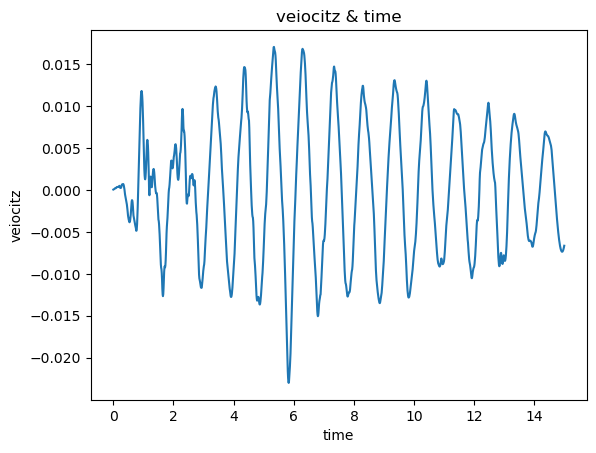

In [95]:
plt.plot(x, y)
plt.xlabel("time")
plt.ylabel("veiocitz")
plt.title("veiocitz & time")

plt.show()  # display

### 2- Displacment & time

In [45]:
x = df["ti"].values

In [46]:
y = df["u_i"].values

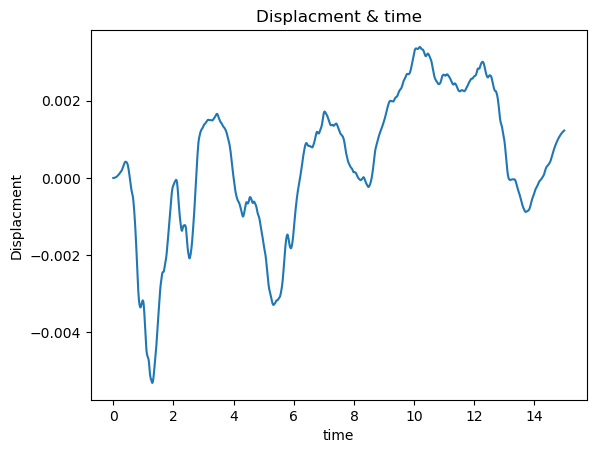

In [47]:
plt.plot(x, y)
plt.xlabel("time")
plt.ylabel("Displacment")
plt.title("Displacment & time")
# To show the plot
plt.show()

### 3- Acc & time

In [48]:
y = df["total_acc_ui2"].values

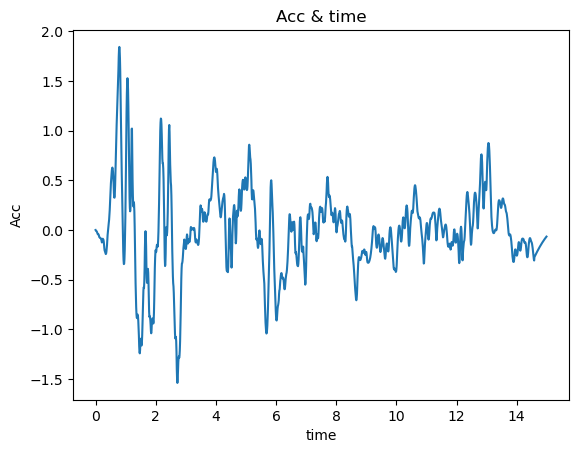

In [49]:
plt.plot(x, y)
plt.xlabel("time")
plt.ylabel("Acc")
plt.title("Acc & time")
# To show the plot
plt.show()

# ks = 0.1  ile 

In [24]:
df2 = central_difference(130, 1500, 0.1, 0.01, 1500, hareket_degerler_2)

In [25]:
df2.head(5)

,step,ti,ground_acc,pi_kn,u_i_1,u_i,pi,u_plus_1,ui_value,ui2_value,total_acc_ui2
0,0.0,0.00,0.00630,0.4732,0.000000e+00,0.000000e+00,0.473200,3.627677e-07,0.000018,-0.003628,0.002672
1,1.0,0.01,0.00364,0.1287,0.000000e+00,3.627677e-07,1.071352,8.213270e-07,0.000023,-0.004586,-0.000946
2,2.0,0.02,0.00099,0.5564,3.627677e-07,8.213270e-07,2.220622,1.702388e-06,0.000044,-0.008811,-0.007821
3,3.0,0.03,0.00428,0.9854,8.213270e-07,1.702388e-06,4.344957,3.330960e-06,0.000081,-0.016286,-0.012006
4,4.0,0.04,0.00758,1.4131,1.702388e-06,3.330960e-06,7.863013,6.027995e-06,0.000135,-0.026970,-0.019390


### 1- veiocitz & time

In [29]:
x2 = df2["ti"].values

In [30]:
y2 = df2["ui_value"].values

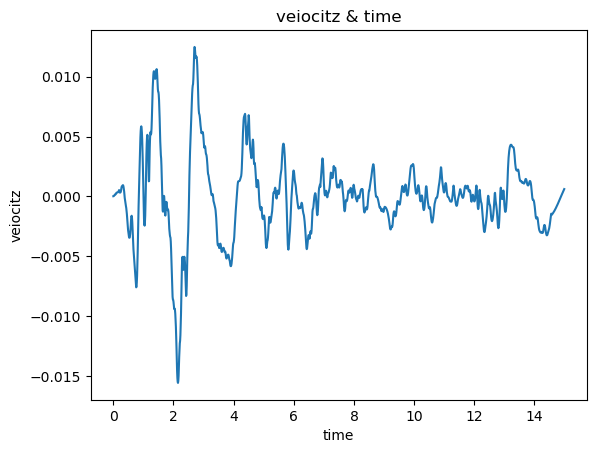

In [31]:
plt.plot(x, y)
plt.xlabel("time")
plt.ylabel("veiocitz")
plt.title("veiocitz & time")

plt.show() 

### 2- Displacment & time

In [ ]:
x = df2["ti"].values

In [ ]:
x = df2["ti"].values